In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

特征数据 x 的形状: (4096, 2)
x 的前5行:
[[-0.39858965  0.90070779]
 [ 0.14218334 -0.02900387]
 [-0.8792544   0.43791846]
 [ 0.37756846 -0.16700112]
 [ 1.28064341 -0.51779955]]

标签数据 y 的形状: (4096,)
y 的前10个值: [0 1 0 1 1 1 1 1 0 0]

类别分布:
类别 0: 2048
类别 1: 2048


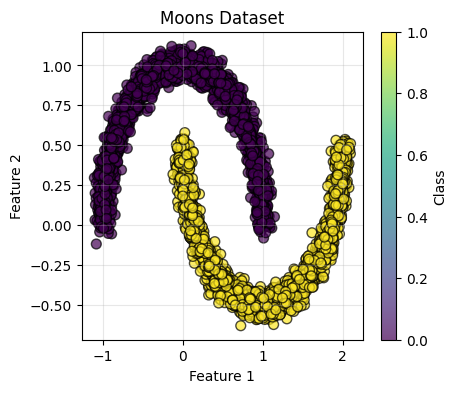

In [6]:
x, y = make_moons(4096, noise=0.05)

# 查看数据信息
print("特征数据 x 的形状:", x.shape)
print("x 的前5行:")
print(x[:5])
print("\n标签数据 y 的形状:", y.shape)
print("y 的前10个值:", y[:10])
print("\n类别分布:")
print("类别 0:", np.sum(y == 0))
print("类别 1:", np.sum(y == 1))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k', s=50)
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)



In [7]:
from models.flow1 import Flow
from torch import nn, Tensor
import torch

# training
flow = Flow()
optimizer = torch.optim.Adam(flow.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(10000):
    x_1 = Tensor(make_moons(256, noise=0.05)[0])
    x_0 = torch.randn_like(x_1)
    t = torch.rand(len(x_1), 1)

    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0

    optimizer.zero_grad()
    loss = loss_fn(flow(x_t, t), dx_t)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, loss: {loss.item():.4f}")


epoch: 0, loss: 1.7570
epoch: 1000, loss: 1.0179
epoch: 2000, loss: 0.9954
epoch: 3000, loss: 0.8922
epoch: 4000, loss: 0.9211
epoch: 5000, loss: 0.9419
epoch: 6000, loss: 1.0903
epoch: 7000, loss: 0.9513
epoch: 8000, loss: 0.8299
epoch: 9000, loss: 0.9941


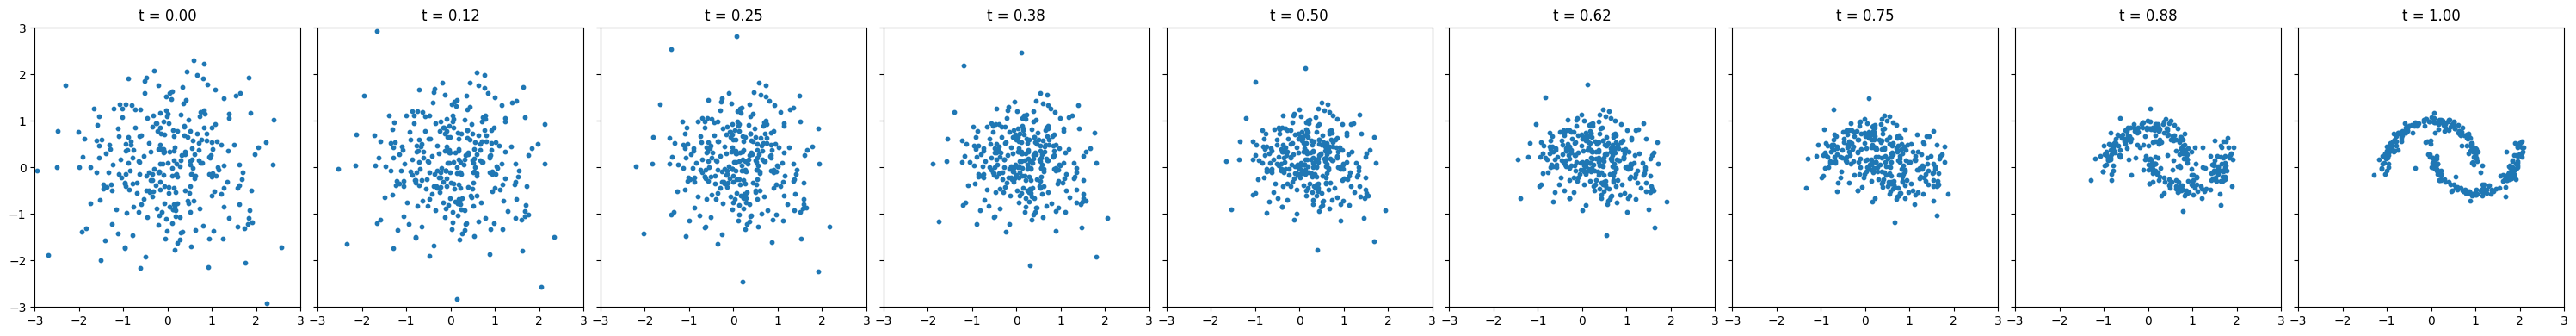

In [9]:
x = torch.randn(300, 2)
n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True)
time_steps = torch.linspace(0, 1.0, n_steps + 1)

axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
axes[0].set_title(f't = {time_steps[0]:.2f}')
axes[0].set_xlim(-3.0, 3.0)
axes[0].set_ylim(-3.0, 3.0)

for i in range(n_steps):
    x = flow.step(x_t=x, t_start=time_steps[i], t_end=time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')

plt.tight_layout()
plt.show()